In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import ConfusionMatrixDisplay

style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [6]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [7]:
num_col = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

In [8]:
df.describe(include='O').T

,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545


In [9]:
cat_col = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [10]:
for col in cat_col:
    print(df[col].value_counts())
    print('------------------')

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
------------------
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
------------------
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
------------------
F    5545
M    5454
Name: Gender, dtype: int64
------------------


In [11]:
pd.get_dummies(df[cat_col], prefix_sep=':')

,Warehouse_block:A,Warehouse_block:B,Warehouse_block:C,Warehouse_block:D,Warehouse_block:F,Mode_of_Shipment:Flight,Mode_of_Shipment:Road,Mode_of_Shipment:Ship,Product_importance:high,Product_importance:low,Product_importance:medium,Gender:F,Gender:M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,0,0,0,0,1,0,0,1,0,0,1,0,1


# Univariate

Numerical

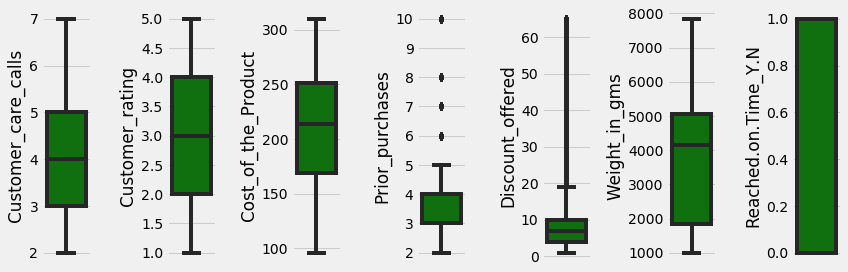

In [12]:
fig = plt.figure(figsize = (12,4))
for i in range(0, len(num_col)):
    plt.subplot(1, len(num_col), i+1)
    sns.boxplot(y=df[num_col[i]], color = 'green', orient = 'v')
    plt.tight_layout()

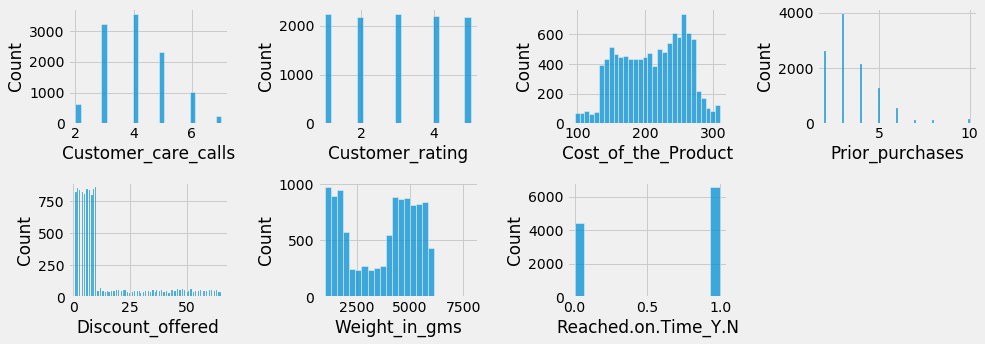

In [13]:
fig = plt.figure(figsize = (14,5))
for i in range(0, len(num_col)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x = df[num_col[i]])
    plt.tight_layout()

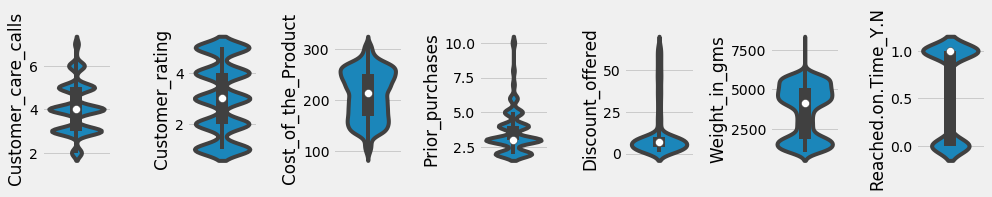

In [14]:
fig = plt.figure(figsize = (14,5))
for i in range(0, len(num_col)):
    plt.subplot(2, len(num_col), i+1)
    sns.violinplot(data = df, y = num_col[i])
    plt.tight_layout()

Categorical

In [15]:
cat_col

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

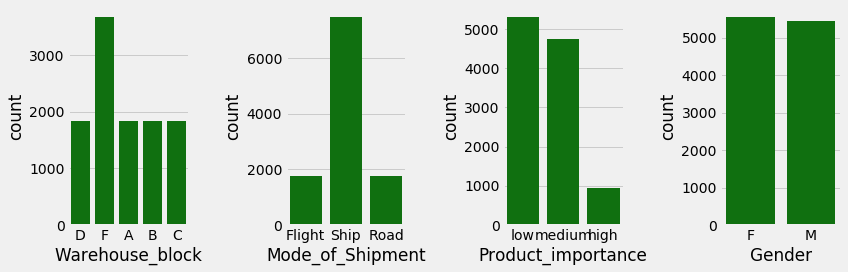

In [16]:
fig = plt.figure(figsize = (12,4))
for i in range(0, len(cat_col)):
    plt.subplot(1, len(cat_col), i+1)
    sns.countplot(x=df[cat_col[i]], color = 'green')
    plt.tight_layout()

# Multivariate

In [17]:
df['On_time?'] = df['Reached.on.Time_Y.N'].apply(lambda x: 'Yes' if x == 0 else 'No')

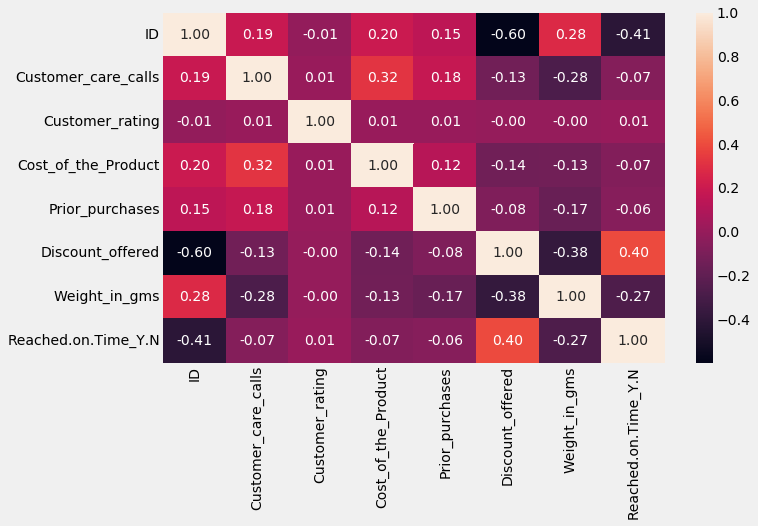

In [18]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, fmt = '.2f')

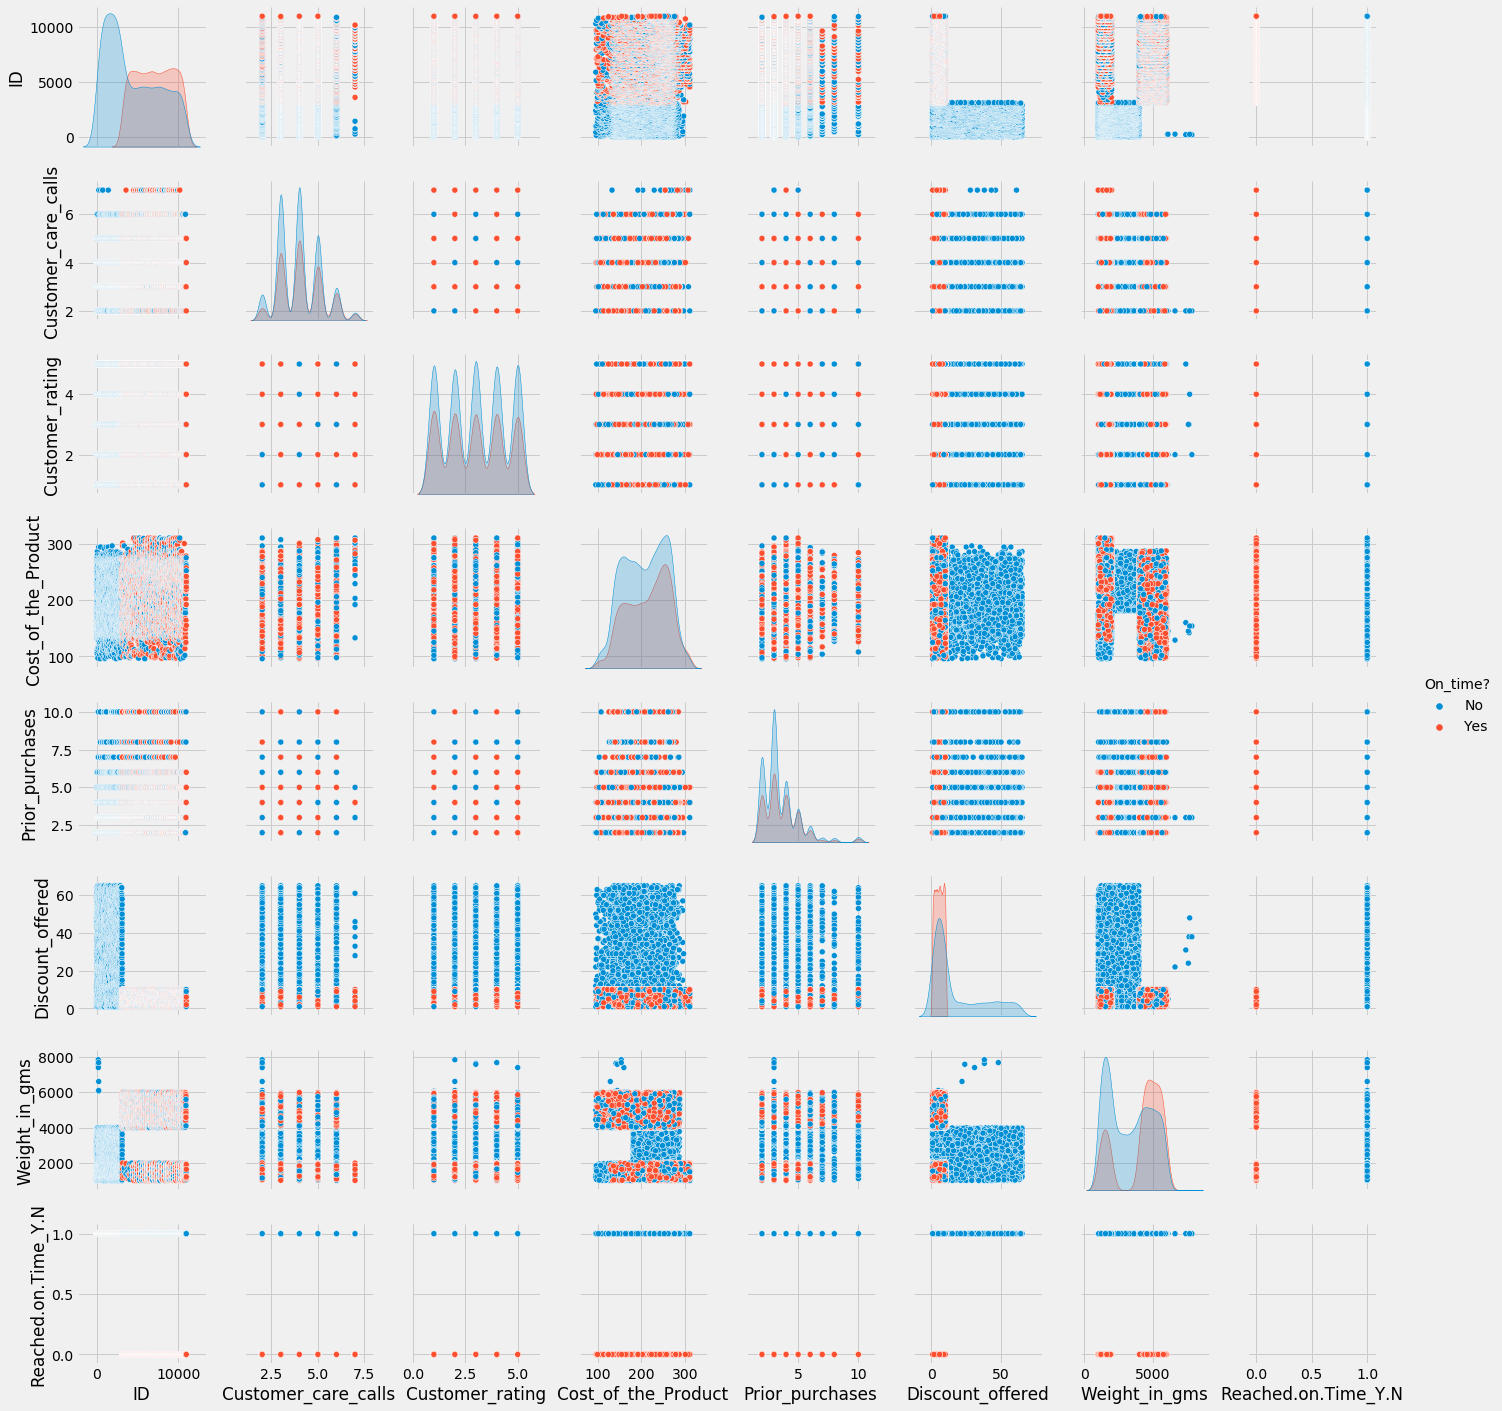

In [19]:
sns.pairplot(df, hue = 'On_time?', diag_kind = 'kde')

Hal terjanggal: 
* Semua ID di bawah 3136 terlambat
* Discount di atas 10% semua terlambat
    * ID > 3136 diskon max 10%
* Weight di antara 2000 - 4000 dan di atas 6000 semua terlambat
    * ID < 3136 weight max 4000 gms
    * ID > 3136 tidak ada weight di antara 2000 - 4000 dan di atas 6000 gms
    * Weight di antara 2000 - 4000 cost product min 181, max 286

In [20]:
NotOnTime = df[df['Reached.on.Time_Y.N'] == 1]
OnTime = df[df['Reached.on.Time_Y.N'] == 0]

In [21]:
NotOnTime.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6563.0,4424.978364,3243.986559,1.0,1641.5,3467.0,7194.5,10995.0
Customer_care_calls,6563.0,3.991467,1.122592,2.0,3.0,4.0,5.0,7.0
Customer_rating,6563.0,3.005790,1.412692,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,6563.0,207.289197,48.054876,96.0,167.0,209.0,249.0,310.0
Prior_purchases,6563.0,3.498095,1.517285,2.0,3.0,3.0,4.0,10.0
Discount_offered,6563.0,18.663721,19.108797,1.0,5.0,9.0,32.0,65.0
Weight_in_gms,6563.0,3272.640104,1576.148391,1001.0,1735.5,3231.0,4696.5,7846.0
Reached.on.Time_Y.N,6563.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [22]:
NotOnTime.describe(include='O').T

,count,unique,top,freq
Warehouse_block,6563,5,F,2194
Mode_of_Shipment,6563,3,Ship,4459
Product_importance,6563,3,low,3140
Gender,6563,2,F,3296
On_time?,6563,1,No,6563


In [23]:
OnTime.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4436.0,7090.479486,2278.543555,3136.0,5092.25,7096.0,9078.5,10999.0
Customer_care_calls,4436.0,4.147656,1.162771,2.0,3.00,4.0,5.0,7.0
Customer_rating,4436.0,2.967989,1.414808,1.0,2.00,3.0,4.0,5.0
Cost_of_the_Product,4436.0,214.498647,47.757432,97.0,174.00,222.0,254.0,310.0
Prior_purchases,4436.0,3.670424,1.525444,2.0,3.00,3.0,4.0,10.0
Discount_offered,4436.0,5.545987,2.877727,1.0,3.00,6.0,8.0,10.0
Weight_in_gms,4436.0,4168.668395,1573.954178,1001.0,4043.50,4674.0,5337.0,6000.0
Reached.on.Time_Y.N,4436.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


In [24]:
OnTime.describe(include='O').T

,count,unique,top,freq
Warehouse_block,4436,5,F,1472
Mode_of_Shipment,4436,3,Ship,3003
Product_importance,4436,3,low,2157
Gender,4436,2,F,2249
On_time?,4436,1,Yes,4436


In [25]:
filter_disc = df['Discount_offered'] <= 10
filter_ID = df['ID'] >= 3136
filter_weight = (df['Weight_in_gms'] <= 6000) & ~((df['Weight_in_gms'] < 4000) & (df['Weight_in_gms'] > 2000))

In [26]:
# All reached on time data
df[~filter_disc | ~filter_ID | ~filter_weight].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.0
mean,1568.000000,3.747687,2.978309,196.000000,3.293780,33.072727,2365.717065,1.0
std,905.140873,0.992862,1.413596,45.584357,1.505831,18.915401,923.487070,0.0
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,1.0
25%,784.500000,3.000000,2.000000,158.000000,2.000000,17.000000,1568.500000,1.0
50%,1568.000000,4.000000,3.000000,192.000000,3.000000,34.000000,2236.000000,1.0
75%,2351.500000,4.000000,4.000000,234.000000,4.000000,49.000000,3136.000000,1.0
max,3135.000000,7.000000,5.000000,296.000000,10.000000,65.000000,7846.000000,1.0


In [27]:
df_filtered = df[filter_disc & filter_ID & filter_weight]
df_filtered.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000
mean,7067.500000,4.176755,2.995422,215.856434,3.676755,5.519964,4139.627035,0.435910
std,2270.285591,1.173508,1.413666,47.859223,1.515963,2.883134,1582.351129,0.495907
min,3136.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,5101.750000,3.000000,2.000000,176.000000,3.000000,3.000000,4020.000000,0.000000
50%,7067.500000,4.000000,3.000000,223.000000,3.000000,6.000000,4657.000000,0.000000
75%,9033.250000,5.000000,4.000000,255.000000,4.000000,8.000000,5323.000000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,10.000000,10.000000,6000.000000,1.000000


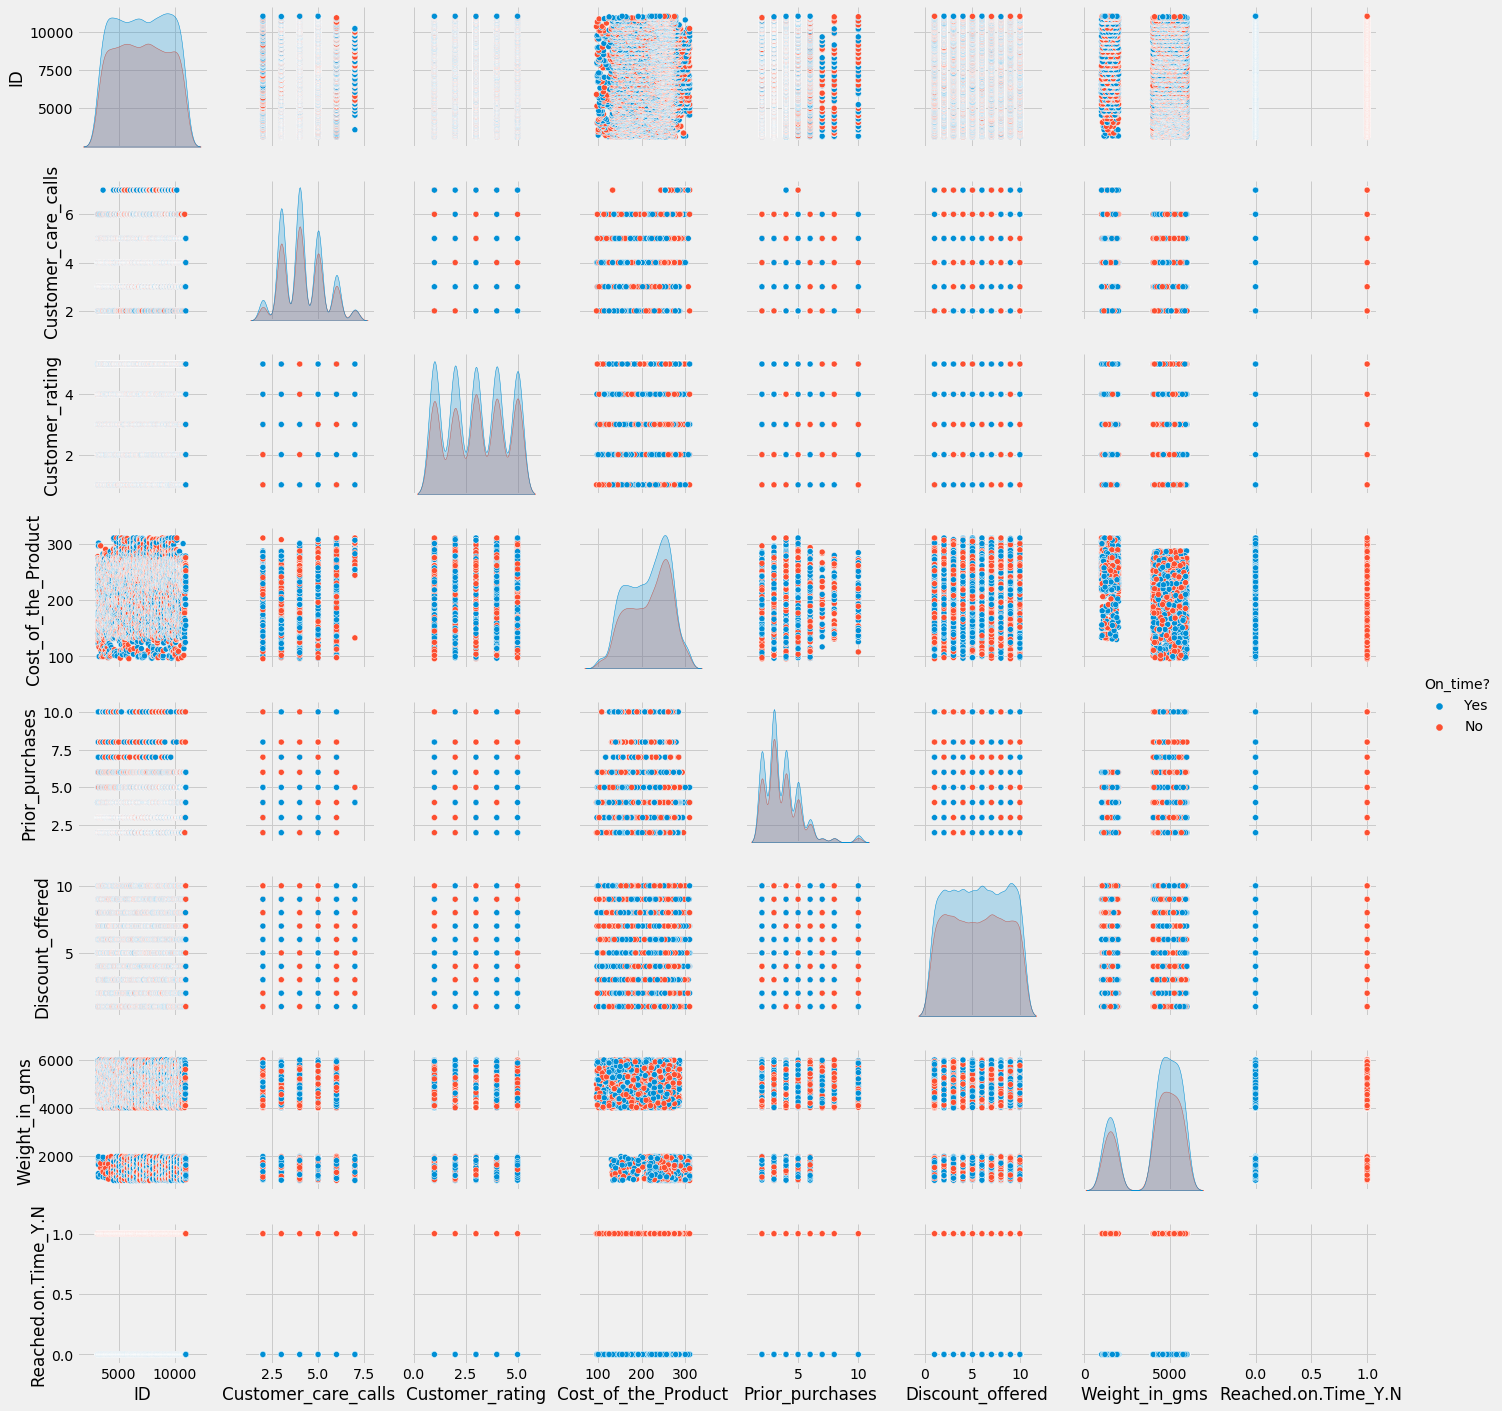

In [28]:
sns.pairplot(df_filtered, hue = 'On_time?', diag_kind = 'kde')

In [29]:
df_filtered[cat_col].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,7864,7864,7864,7864
unique,5,3,3,2
top,F,Ship,low,F
freq,2621,5323,3842,3957


In [30]:
df_filtered.corr()[['Reached.on.Time_Y.N']]

,Reached.on.Time_Y.N
ID,-0.011515
Customer_care_calls,0.028210
Customer_rating,0.022076
Cost_of_the_Product,0.032275
Prior_purchases,0.004751
Discount_offered,-0.010268
Weight_in_gms,-0.020879
Reached.on.Time_Y.N,1.000000


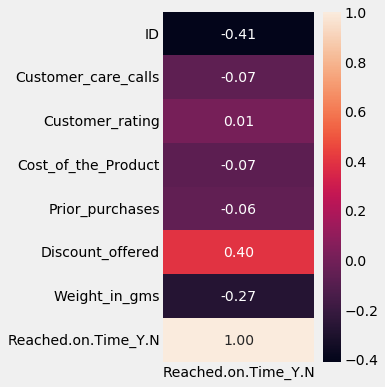

In [31]:
fig = plt.figure(figsize = (3,6))
sns.heatmap(df.corr()[['Reached.on.Time_Y.N']], annot=True, fmt = '.2f')

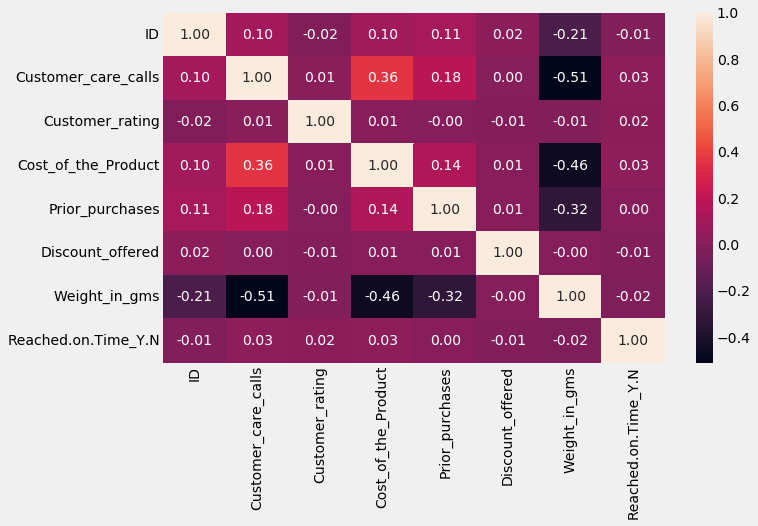

In [32]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(df_filtered.corr(), annot=True, fmt = '.2f')

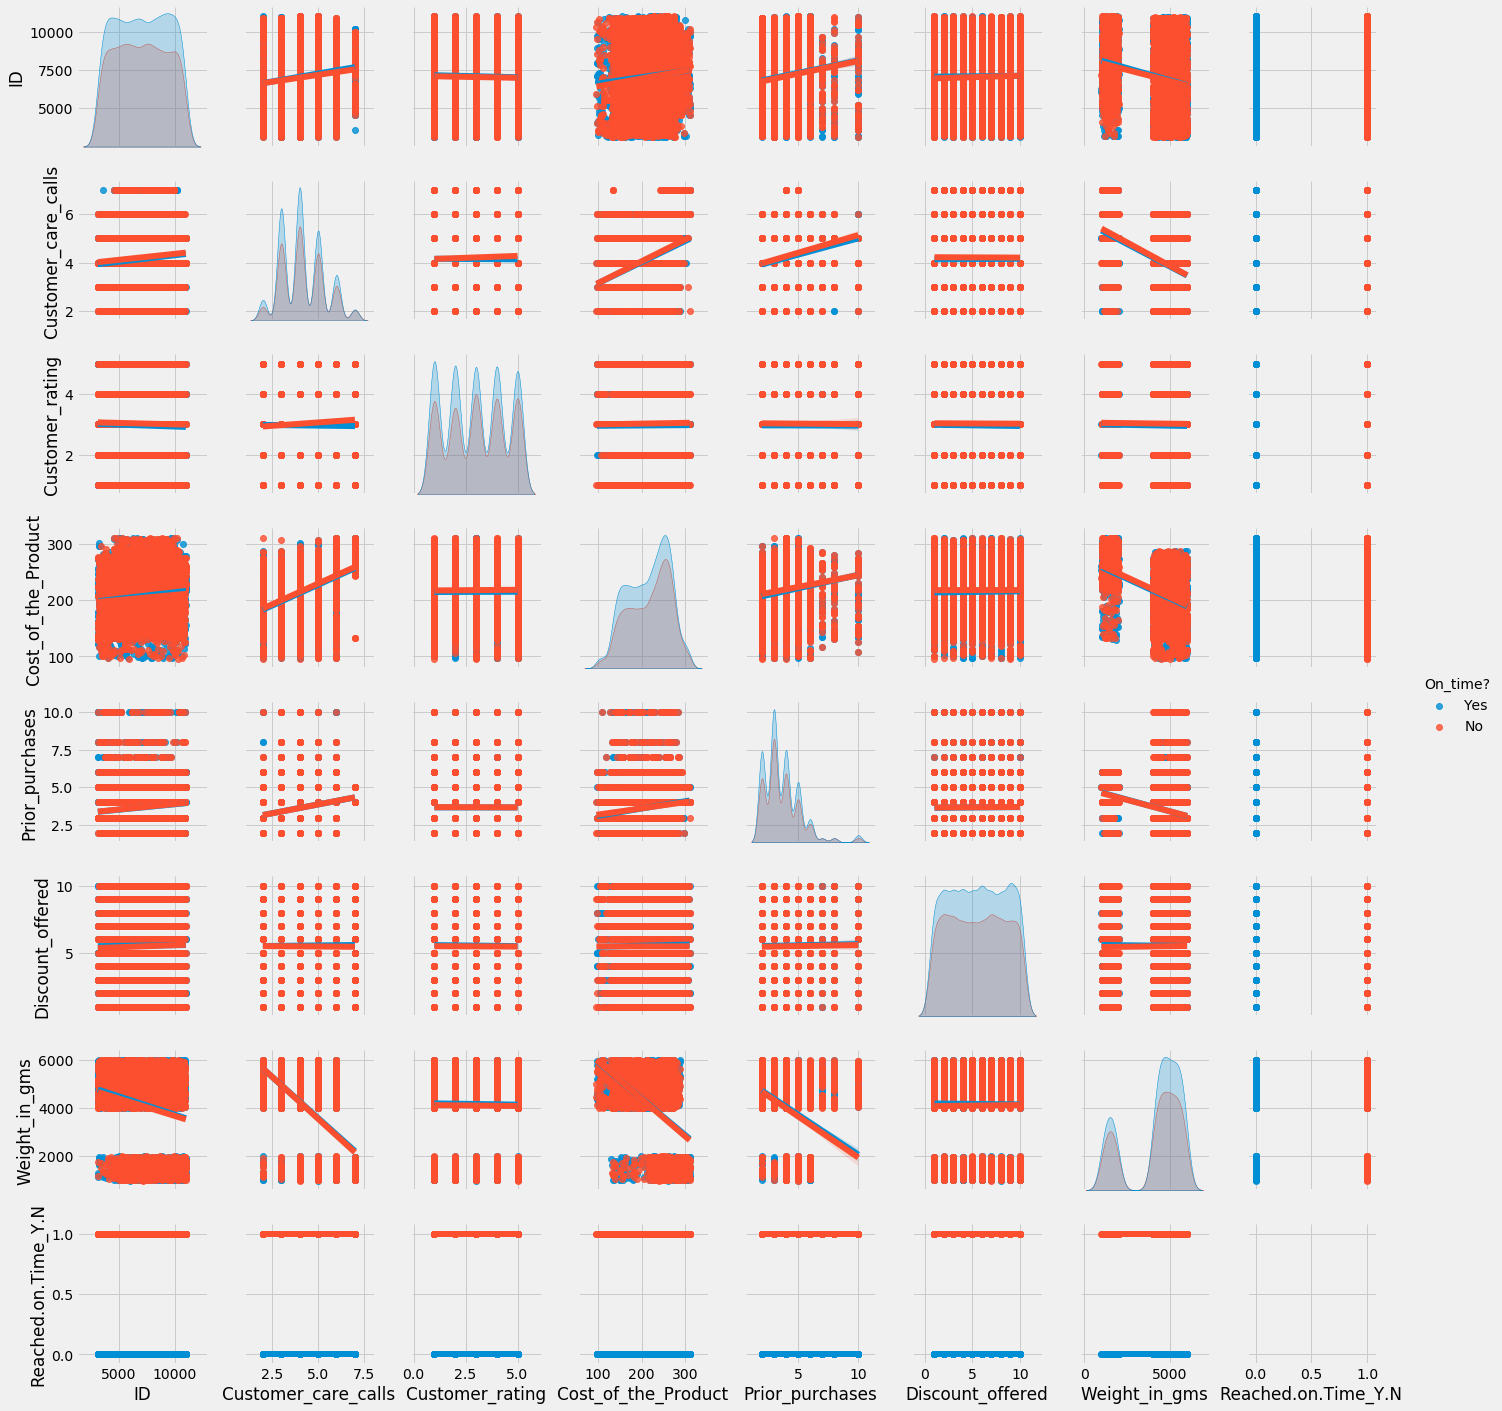

In [33]:
sns.pairplot(df_filtered, hue = 'On_time?', diag_kind = 'kde', kind = 'reg')

In [34]:
cat_col

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [35]:
num_col

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [36]:
def rasio_plot(data, col):
    df = data.copy()
    g = df.groupby(col)['On_time?'].value_counts(normalize=True).unstack('On_time?').plot(kind='barh', stacked=True)
    g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    #g.set_ylabel('Partner Dependants Group')
    g.legend(loc='center', title = "on time?")

    for p in g.patches:
        g.annotate(format(p.get_width(), '.2%'),
                   xy = (p.get_x() + p.get_width() / 2,
                         p.get_y() + p.get_height() / 2,),
                   ha = 'center',
                   va = 'center',
                   color = 'white'
                  )
    plt.show()

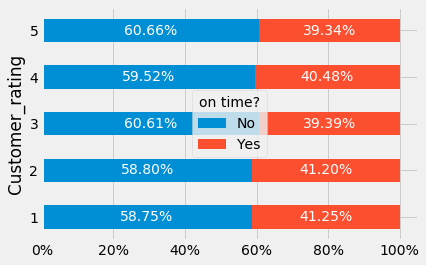

In [37]:
rasio_plot(data = df, col = 'Customer_rating')

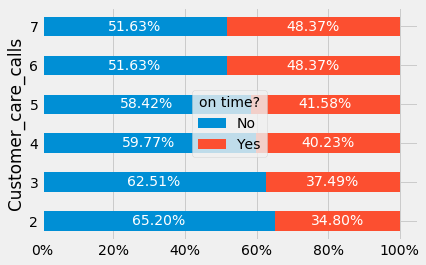

In [38]:
rasio_plot(data = df, col = 'Customer_care_calls')

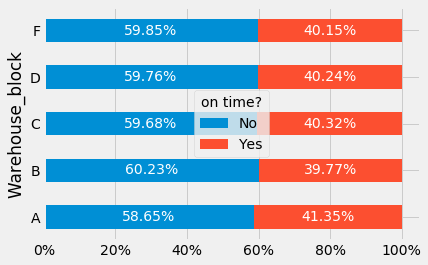

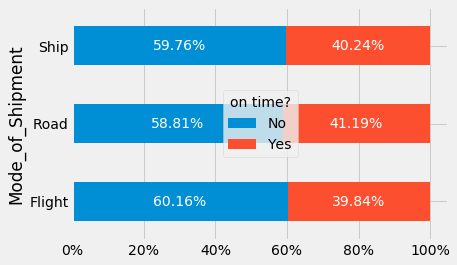

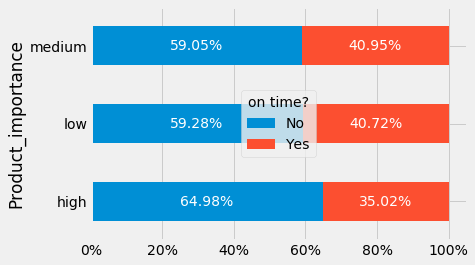

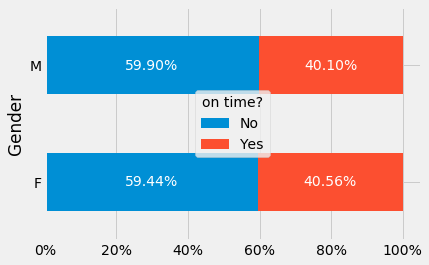

In [39]:
for col in cat_col:
    rasio_plot(data = df, col=col)

In [40]:
#for col in cat_col:
#    rasio_plot(data = df_filtered, col=col)

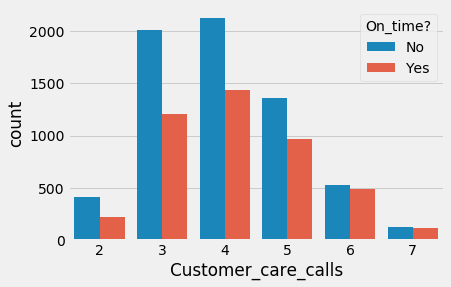

In [41]:
sns.countplot(data = df, x = 'Customer_care_calls', hue = 'On_time?')

# Segmentasi

Diskon:
* Under 10%
* Over 10%

Berat:
* 0 - 2 kg
* 2 - 4 kg
* 4 - 6 kg
* 6 - 8 kg

In [42]:
def segmentasi_berat(x):
    if x <= 2000:
        return 1
    elif x < 4000:
        return 2
    elif x <= 6000:
        return 3
    else: return 4

In [43]:
df['segmen_diskon'] = df['Discount_offered'].apply(lambda x: 1 if x <= 10 else 2)
df['segmen_berat'] = df['Weight_in_gms'].apply(lambda x: segmentasi_berat(x))

In [44]:
df[['segmen_diskon', 'segmen_berat']]

,segmen_diskon,segmen_berat
0,2,1
1,2,2
2,2,2
3,1,1
4,2,2
...,...,...
10994,1,1
10995,1,1
10996,1,1
10997,1,1


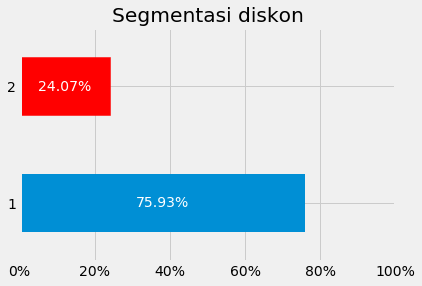

In [45]:
g = df['segmen_diskon'].value_counts(normalize = True).plot(kind='barh', stacked=True)
g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_title('Segmentasi diskon')
g.set_xlim(0,1)
g.get_children()[1].set_color('red')
#g.legend(loc='center', title = "on time?")

for p in g.patches:
    g.annotate(format(p.get_width(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

In [46]:
df['segmen_diskon'].value_counts()

1    8352
2    2647
Name: segmen_diskon, dtype: int64

Diskon:
1. Under 10%
2. Over 10%

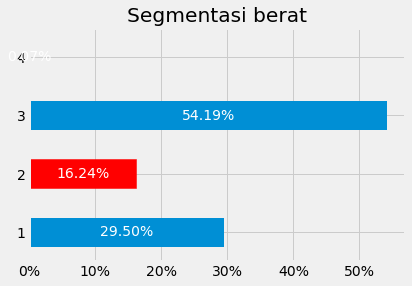

In [47]:
g = df['segmen_berat'].value_counts(normalize = True).sort_index().plot(kind='barh', stacked=True)
g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_title('Segmentasi berat')
g.get_children()[1].set_color('red')
g.get_children()[3].set_color('red')
#g.legend(loc='center', title = "on time?")

for p in g.patches:
    g.annotate(format(p.get_width(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

In [48]:
df['segmen_berat'].value_counts().sort_index()

1    3245
2    1786
3    5960
4       8
Name: segmen_berat, dtype: int64

Berat:
1. 0 - 2 kg
2. 2 - 4 kg
3. 4 - 6 kg
4. 6 - 8 kg

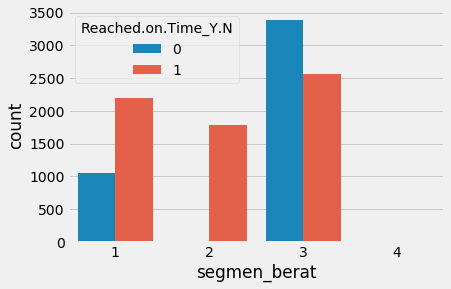

In [49]:
g = sns.countplot(data = df, x = 'segmen_berat', hue='Reached.on.Time_Y.N')

In [50]:
df_temp = df.groupby(['segmen_berat', 'On_time?']).agg({'ID': 'count'}).reset_index()
df_temp['persen'] = df_temp['ID'] / df_temp['ID'].sum()
df_temp

,segmen_berat,On_time?,ID,persen
0,1,No,2199,0.199927
1,1,Yes,1046,0.095100
2,2,No,1786,0.162378
3,3,No,2570,0.233658
4,3,Yes,3390,0.308210
5,4,No,8,0.000727


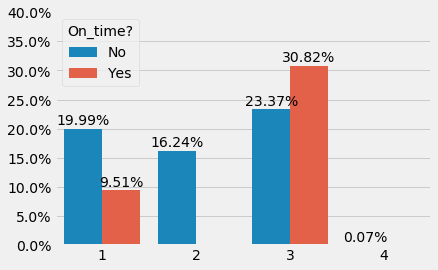

In [51]:
g = sns.barplot(data = df_temp, x = 'segmen_berat', y = 'persen', hue = 'On_time?')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#g.set_title("Did the senior citizen use Phone Service?")
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,.4)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

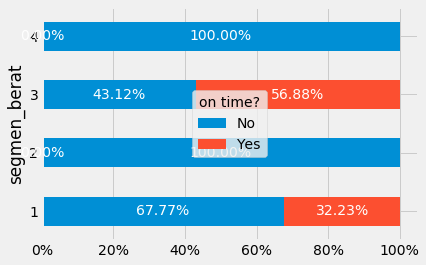

In [52]:
rasio_plot(data = df, col = 'segmen_berat')

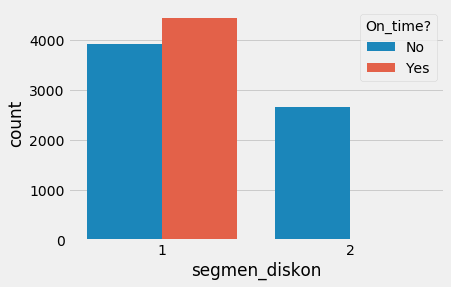

In [53]:
sns.countplot(data = df, x = 'segmen_diskon', hue='On_time?')

In [54]:
df_temp = df.groupby(['segmen_diskon', 'On_time?']).agg({'ID': 'count'}).reset_index()
df_temp['persen'] = df_temp['ID'] / df_temp['ID'].sum()
df_temp

,segmen_diskon,On_time?,ID,persen
0,1,No,3916,0.356032
1,1,Yes,4436,0.403309
2,2,No,2647,0.240658


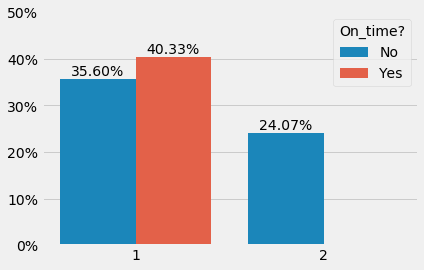

In [55]:
g = sns.barplot(data = df_temp, x = 'segmen_diskon', y = 'persen', hue = 'On_time?')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#g.set_title("Did the senior citizen use Phone Service?")
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,.5)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

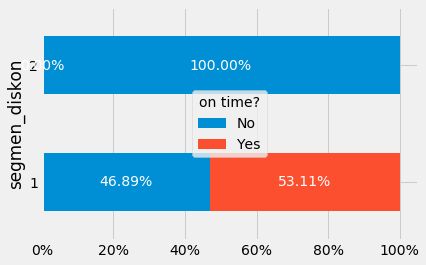

In [56]:
rasio_plot(data = df, col = 'segmen_diskon')

# Deep Dive

Minta tolong untuk buat cek pop ini, plus nitip distribusi mode of shipment, warehouse, dst untuk yang segmen 100% terlambat  kah? (by weight atau diskon)

In [57]:
df_temp = df.groupby(['Product_importance', 'On_time?']).agg({'ID': 'count'}).reset_index()
df_temp['persen'] = df_temp['ID'] / df_temp['ID'].sum()
df_temp

,Product_importance,On_time?,ID,persen
0,high,No,616,0.056005
1,high,Yes,332,0.030185
2,low,No,3140,0.285480
3,low,Yes,2157,0.196109
4,medium,No,2807,0.255205
5,medium,Yes,1947,0.177016


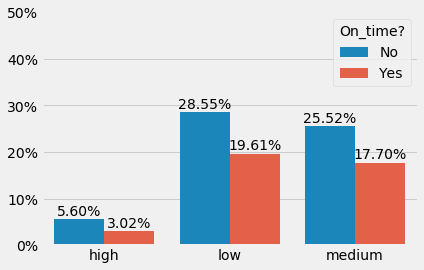

In [58]:
g = sns.barplot(data = df_temp, x = 'Product_importance', y = 'persen', hue = 'On_time?')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#g.set_title("Did the senior citizen use Phone Service?")
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,.5)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

## 100% Terlambat

By Discount (Up 10%)

In [59]:
df_disc = df.copy()
df_disc['disc_cat'] = df_disc['Discount_offered'].apply(lambda x: '<= 10' if x <= 10 else '> 10')
df_disc.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,On_time?,segmen_diskon,segmen_berat,disc_cat
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,No,2,1,> 10
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,No,2,2,> 10
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,No,2,2,> 10
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,No,1,1,<= 10
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,No,2,2,> 10


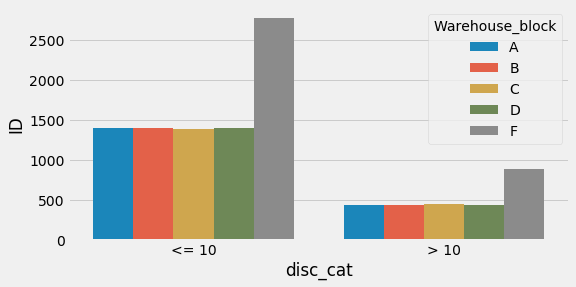

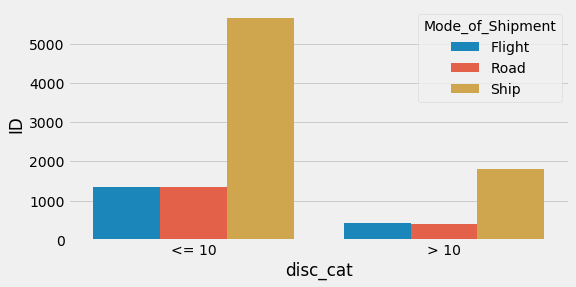

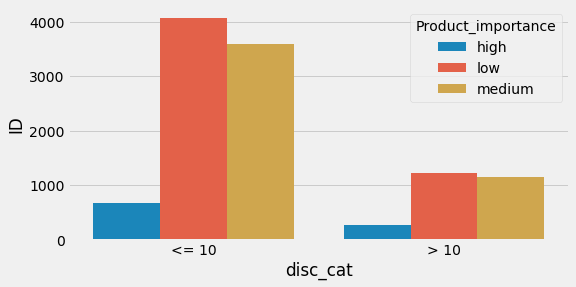

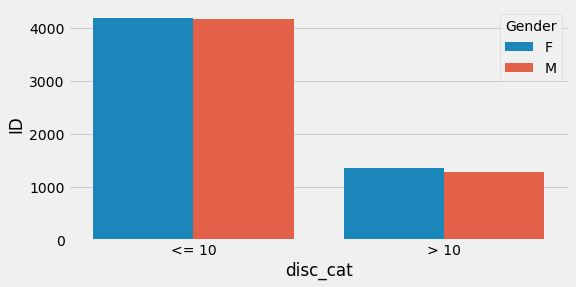

In [60]:
for col in cat_col:
    temp = df_disc.groupby(['disc_cat', col]).agg({'ID': 'count'}).reset_index()
    fig = plt.figure(figsize = (8,4))
    sns.barplot(data = temp, x = 'disc_cat', y = 'ID', hue = col)
    plt.show()

By Weight

In [61]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,On_time?,segmen_diskon,segmen_berat
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,No,2,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,No,2,2
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,No,2,2
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,No,1,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,No,2,2


In [62]:
def segmentasi_berat(x):
    if x <= 2000:
        return '0 - 2'
    elif x < 4000:
        return '2 - 4'
    elif x <= 6000:
        return '4 - 6'
    else: return '6 - 8'

In [63]:
df_weight = df.copy()
df_weight['weight_cat'] = df_disc['Weight_in_gms'].apply(lambda x: segmentasi_berat(x))
df_weight.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,On_time?,segmen_diskon,segmen_berat,weight_cat
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,No,2,1,0 - 2
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,No,2,2,2 - 4
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,No,2,2,2 - 4
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,No,1,1,0 - 2
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,No,2,2,2 - 4


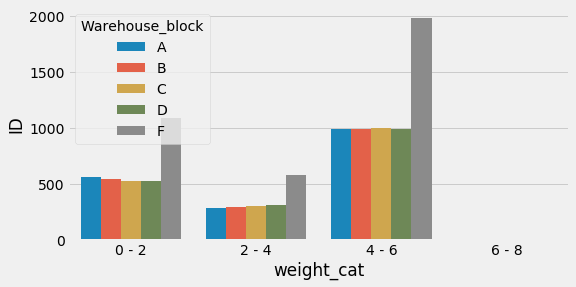

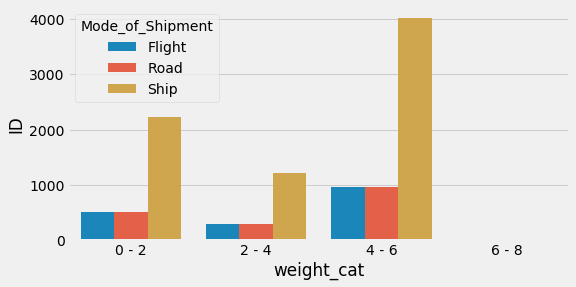

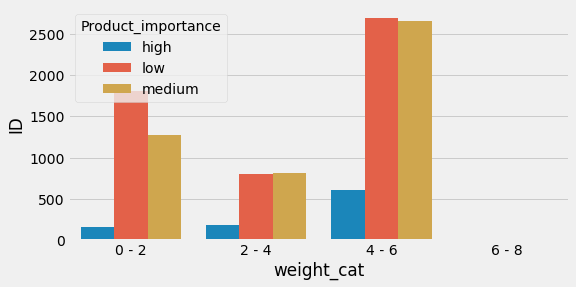

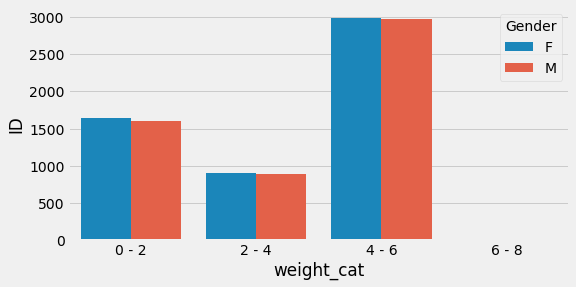

In [64]:
for col in cat_col:
    temp = df_weight.groupby(['weight_cat', col]).agg({'ID': 'count'}).reset_index()
    fig = plt.figure(figsize = (8,4))
    sns.barplot(data = temp, x = 'weight_cat', y = 'ID', hue = col)
    plt.show()

In [65]:
df_cop = df.copy()

In [66]:
df_cop

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,On_time?,segmen_diskon,segmen_berat
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,No,2,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,No,2,2
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,No,2,2
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,No,1,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,No,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,No,1,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,Yes,1,1
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,Yes,1,1
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,Yes,1,1


In [67]:
def segmen_cop(x):
    if x < 138.8:
        return 1
    elif x < 181.6:
        return 2
    elif x < 224.4:
        return 3
    elif x < 267.2:
        return 4
    else: return 5

In [68]:
df_cop['segment_cop'] = df_cop['Cost_of_the_Product'].apply(lambda x: segmen_cop(x))

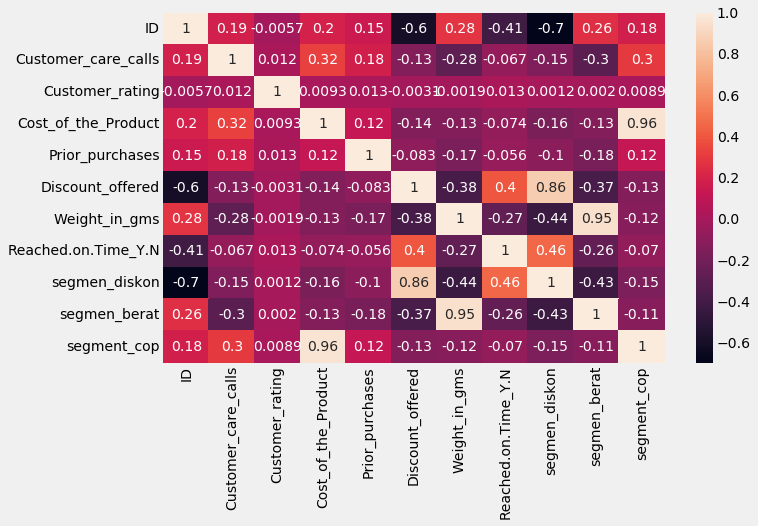

In [69]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(df_cop.corr(), annot = True)

C:\Users\Asif\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Asif\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Asif\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


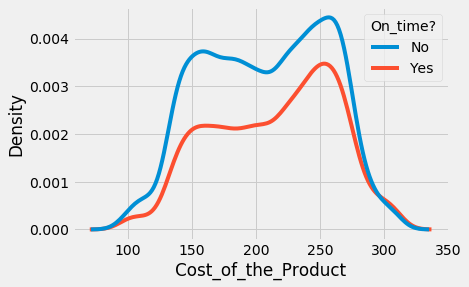

In [70]:
sns.kdeplot(data = df, x = 'Cost_of_the_Product', hue = 'On_time?')